In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import ndcg_score  # Assuming NDCG is your evaluation metric
from sklearn.preprocessing import LabelEncoder # If you have categorical target variables
import os
import joblib

In [15]:
train_file_path_local = '../assets/combined/train_ready.pkl'
test_file_path_local = '../assets/combined/test_ready.pkl'

In [3]:
raw_train_file_path_local = '../assets/combined/train_raw.pkl'
raw_test_file_path_local = '../assets/combined/test_raw.pkl'

In [4]:
df_train_raw = joblib.load(raw_train_file_path_local)
df_test_raw = joblib.load(raw_test_file_path_local)
print("Training data loaded successfully!")
print("Training data shape:", df_train_raw.shape)
print("\nFirst few rows of training data (as DataFrame):\n", df_train_raw.head())  # Print the first 5 rows of the DataFrame
print("\nTesting data loaded successfully!")
print("Testing data shape:", df_test_raw.shape)
print("\nFirst few rows of testing data (as DataFrame):\n", df_test_raw.head())  # Print the first 5 rows of the DataFrame

Training data loaded successfully!
Training data shape: (2643279, 50)

First few rows of training data (as DataFrame):
              user_id  app_id  relevance_score user_country_code  \
0  76561198073669602    4000         0.641805           Missing   
1  76561198073669602    2590         0.000000           Missing   
2  76561198073669602   11200         0.734365           Missing   
3  76561198073669602      20         0.000000           Missing   
4  76561198073669602      50         0.000000           Missing   

   user_has_coordinates  user_latitude  user_longitude  \
0                 False            NaN             NaN   
1                 False            NaN             NaN   
2                 False            NaN             NaN   
3                 False            NaN             NaN   
4                 False            NaN             NaN   

   user_account_age_months                  game_name  game_tba  ...  \
0               149.106555                Garry's Mod   

In [5]:
df_train_raw.columns

Index(['user_id', 'app_id', 'relevance_score', 'user_country_code',
       'user_has_coordinates', 'user_latitude', 'user_longitude',
       'user_account_age_months', 'game_name', 'game_tba',
       'game_RAWG_weighted_avg_rating', 'game_RAWG_ratings_count',
       'game_RAWG_reviews_with_text_count', 'game_RAWG_bookmark_count',
       'game_metacritic_rating', 'game_RAWG_system_suggest_count',
       'game_RAWG_reviews_count', 'game_genres', 'game_tags',
       'game_esrb_rating', 'game_released_year', 'game_released_month',
       'game_released_day', 'game_RAWG_rating_5_percent',
       'game_RAWG_rating_4_percent', 'game_RAWG_rating_3_percent',
       'game_RAWG_rating_1_percent', 'game_RAWG_bookmark_type_yet_count',
       'game_RAWG_bookmark_type_owned_count',
       'game_RAWG_bookmark_type_beaten_count',
       'game_RAWG_bookmark_type_toplay_count',
       'game_RAWG_bookmark_type_dropped_count',
       'game_RAWG_bookmark_type_playing_count', 'game_available_platform',
     

In [18]:
df_train_ready = joblib.load(train_file_path_local)
df_test_ready = joblib.load(test_file_path_local)
print("Training data loaded successfully!")
print("Training data shape:", df_train_ready.shape)
print("\nFirst few rows of training data (as DataFrame):\n", df_train_ready.head())  # Print the first 5 rows of the DataFrame
print("\nTesting data loaded successfully!")
print("Testing data shape:", df_test_ready.shape)
print("\nFirst few rows of testing data (as DataFrame):\n", df_test_ready.head())  # Print the first 5 rows of the DataFrame
print(df_train_ready.columns)

Training data loaded successfully!
Training data shape: (2643279, 130)

First few rows of training data (as DataFrame):
              user_id  app_id  relevance_score user_country_code  \
0  76561198073669602    4000         0.641805           Missing   
1  76561198073669602    2590         0.000000           Missing   
2  76561198073669602   11200         0.734365           Missing   
3  76561198073669602      20         0.000000           Missing   
4  76561198073669602      50         0.000000           Missing   

   user_has_coordinates  user_latitude  user_longitude  \
0                 False       0.013426        0.127397   
1                 False       0.013426        0.127397   
2                 False       0.013426        0.127397   
3                 False       0.013426        0.127397   
4                 False       0.013426        0.127397   

   user_account_age_months                  game_name  game_tba  ...  \
0                -0.931663                Garry's Mod  

In [7]:
# import pandas as pd
# import numpy as np
# import sys
# import io # To capture info output if needed

# def examine_dataframe(df, df_name="DataFrame"):
#     """
#     Prints comprehensive information about a pandas DataFrame.

#     Args:
#         df (pd.DataFrame): The DataFrame to examine.
#         df_name (str): The name of the DataFrame for printing headers.
#     """
#     print("=" * 70)
#     print(f"Examining: {df_name}")
#     print("=" * 70)

#     # --- Basic Checks ---
#     if df is None:
#         print("[INFO] DataFrame object is None.")
#         print("=" * 70 + "\n")
#         return
#     if not isinstance(df, pd.DataFrame):
#         print(f"[ERROR] Object '{df_name}' is not a pandas DataFrame (Type: {type(df)}). Cannot examine.")
#         print("=" * 70 + "\n")
#         return
#     if df.empty:
#         print("[INFO] DataFrame is empty.")
#         print("=" * 70 + "\n")
#         return

#     # --- Examination Steps ---
#     try:
#         # 1. Shape
#         print("\n--- Shape ---")
#         print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

#         # 2. Info (Data Types, Non-Null Counts, Memory Usage)
#         print("\n--- Info ---")
#         # Capture info output to prevent it from truncating in some environments
#         buffer = io.StringIO()
#         df.info(verbose=True, show_counts=True, buf=buffer)
#         info_str = buffer.getvalue()
#         print(info_str)

#         # 3. Head (First 5 Rows) - Display more columns temporarily
#         print("\n--- Head (First 5 Rows) ---")
#         with pd.option_context('display.max_rows', 5, 'display.max_columns', None, 'display.width', 1000):
#             print(df.head())

#         # 4. Tail (Last 5 Rows) - Useful for comparison
#         print("\n--- Tail (Last 5 Rows) ---")
#         with pd.option_context('display.max_rows', 5, 'display.max_columns', None, 'display.width', 1000):
#             print(df.tail())

#         # 5. Describe (Statistical Summary - including categorical/object)
#         print("\n--- Describe (Statistics) ---")
#         # include='all' provides stats for object/category columns too
#         described_df = df.describe(include='all').transpose()
#         with pd.option_context('display.max_rows', described_df.shape[0], 'display.max_columns', described_df.shape[1], 'display.width', 1000):
#              print(described_df)

#         # 6. Value Counts for Object/Category Columns (Sample)
#         print("\n--- Value Counts (Sample for Low-Cardinality Object/Category Columns) ---")
#         MAX_UNIQUE_FOR_VALUE_COUNTS = 50 # Only show full counts for columns below this
#         MAX_COLS_TO_SHOW_VC = 10       # Limit how many columns we run value_counts on
#         cols_to_check = df.select_dtypes(include=['object', 'category']).columns
#         checked_count = 0

#         if not cols_to_check.empty:
#             print(f"[INFO] Checking first {min(len(cols_to_check), MAX_COLS_TO_SHOW_VC)} object/category columns for value counts...")
#             for col in cols_to_check:
#                 if checked_count >= MAX_COLS_TO_SHOW_VC:
#                     print(f"\n[INFO] Reached limit ({MAX_COLS_TO_SHOW_VC}) for showing value counts.")
#                     break
#                 print(f"\n--- Value Counts: '{col}' ---")
#                 try:
#                     # Handle potential presence of lists/unhashable types gracefully
#                     if any(isinstance(i, (list, dict, set)) for i in df[col].head(100).dropna()):
#                          print("[INFO] Column seems to contain unhashable types (e.g., lists). Skipping detailed value counts.")
#                          # Optionally show type distribution if lists are present
#                          print("Type distribution (sample):")
#                          print(df[col].apply(type).value_counts())
#                     else:
#                         unique_count = df[col].nunique()
#                         print(f"Unique values: {unique_count}")

#                         if unique_count == 0:
#                              print("No non-null values found.")
#                         elif unique_count < MAX_UNIQUE_FOR_VALUE_COUNTS:
#                             print(df[col].value_counts(dropna=False)) # Include NaNs in count
#                         else:
#                             # Show top 5 most frequent for high cardinality
#                             print(f"(Top 5 values for high cardinality column):")
#                             print(df[col].value_counts(dropna=False).head(5))
#                     checked_count += 1
#                 except Exception as e_vc:
#                     print(f"[ERROR] Could not get value counts for '{col}': {e_vc}")
#         else:
#             print("[INFO] No object or category columns found.")

#     except Exception as e_main:
#          print(f"\n[ERROR] An error occurred during examination of {df_name}: {e_main}")
#          import traceback
#          print(traceback.format_exc())

#     finally:
#         print("\n" + "=" * 70)
#         print(f"Finished Examining: {df_name}")
#         print("=" * 70 + "\n")

# # --- Main Execution ---

# print("*"*30 + " Examining df_train_raw " + "*"*30)
# # Check if the variable exists in the global namespace
# if 'df_train_raw' in locals() or 'df_train_raw' in globals():
#     examine_dataframe(df_train_raw, "df_train_raw (Before Feature Engineering)")
# else:
#     print("[WARN] DataFrame 'df_train_raw' not found in the current environment.")

# print("\n" + "*"*30 + " Examining df_train_ready " + "*"*30)
# # Check if the variable exists in the global namespace
# if 'df_train_ready' in locals() or 'df_train_ready' in globals():
#     examine_dataframe(df_train_ready, "df_train_ready (After Feature Engineering)")
# else:
#     print("[WARN] DataFrame 'df_train_ready' not found in the current environment.")

count    2.643279e+06
mean     2.774212e-01
std      3.482629e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.021035e-01
max      9.999999e-01
Name: relevance_score, dtype: float64
Axes(0.125,0.11;0.775x0.77)


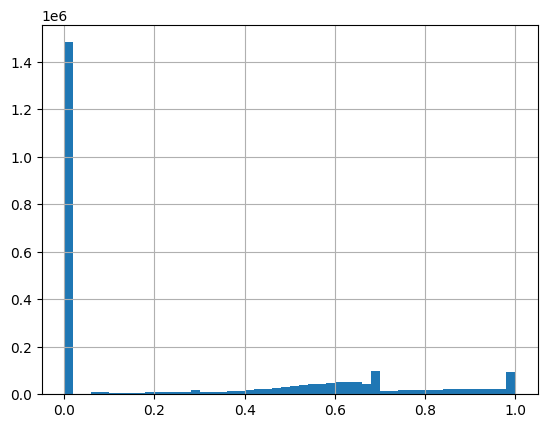

In [8]:
print(df_train_raw['relevance_score'].describe())
print(df_train_raw['relevance_score'].hist(bins=50)) # Visualize the distribution

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from collections import Counter
import traceback
import gc # Garbage collection for memory management
# No 'ast' needed now if embeddings are already lists in df_train_ready

print("[INFO] Starting preprocessing pipeline (Borrowing Embeddings from df_train_ready)...")
print("-" * 70)

# --- Configuration ---
TARGET_COLUMN = 'relevance_score'
# Embedding columns - These will be borrowed from df_train_ready
embedding_cols = ['user_emb', 'game_emb']
# Other feature processing config (same as before)
game_tags_col = 'game_tags'
N_TOP_TAGS = 500
game_genres_col = 'game_genres'
platform_col = 'game_available_platform'
single_item_list_cols = ['game_developer', 'game_publisher']
N_TOP_DEV_PUB = 150
low_card_categorical_cols = ['user_country_code', 'game_esrb_rating']
numerical_cols_to_keep = [
    'user_account_age_months', 'game_RAWG_weighted_avg_rating',
    'game_RAWG_ratings_count', 'game_RAWG_bookmark_count',
    'game_positive_review_count', 'game_negative_review_count',
    'game_avg_playtime_forever', 'game_median_playtime_forever',
    'game_current_price', 'game_initial_price', 'game_concurrent_user',
    'game_estimate_owners_lower', 'game_estimate_owners_upper',
]
date_col = 'game_released_year'
REF_YEAR = 1984

# --- Storage for fitted objects (MUST keep this for X_test) ---
fitted_transformers = {
    'numerical_medians': {},
    'embedding_dim': None,
    'embedding_fill_value': None,
    'top_n_tags': None,
    'mlb_genres': None,
    'mlb_platform': None,
    'top_n_developers': None,
    'top_n_publishers': None,
    # 'scaler': None
}

# --- Data Loading Checks ---
if 'df_train_raw' not in locals() or not isinstance(df_train_raw, pd.DataFrame):
    print(f"[ERROR] DataFrame 'df_train_raw' not found or not a DataFrame. Please load data.")
    df_train_raw = pd.DataFrame() # Avoid crash in example
if 'df_train_ready' not in locals() or not isinstance(df_train_ready, pd.DataFrame):
    print(f"[ERROR] DataFrame 'df_train_ready' not found or not a DataFrame. Needed for embeddings.")
    df_train_ready = pd.DataFrame() # Avoid crash in example

X_train = None
y_train = None

# --- Start Processing ---
# Check required DataFrames exist and are not empty
if isinstance(df_train_raw, pd.DataFrame) and not df_train_raw.empty and \
   isinstance(df_train_ready, pd.DataFrame) and not df_train_ready.empty:
    try:
        # Create a copy to work on
        print("[INFO] Creating copy of df_train_raw...")
        X_train = df_train_raw.copy()
        del df_train_raw
        gc.collect()
        print("[INFO] Copy created.")

        # --- Separate Target Variable ---
        print(f"[INFO] Separating target variable '{TARGET_COLUMN}'...")
        if TARGET_COLUMN in X_train.columns:
            y_train = X_train[TARGET_COLUMN].copy()
            X_train = X_train.drop(columns=[TARGET_COLUMN])
            print(f"[SUCCESS] Separated '{TARGET_COLUMN}'.")
        else:
            raise ValueError(f"Target column '{TARGET_COLUMN}' not found!")

        # --- Initial Column Drop ---
        # Keep 'user_id', 'app_id' in X_train for merging embeddings
        merge_keys = ['user_id', 'app_id']
        if not all(key in X_train.columns for key in merge_keys):
             raise ValueError(f"Merge keys {merge_keys} not found in df_train_raw.")

        cols_to_drop = [ # As defined before
             'game_name', 'user_has_coordinates', 'user_latitude', 'user_longitude',
             'game_tba', 'game_metacritic_rating', 'game_RAWG_reviews_with_text_count',
             'game_RAWG_system_suggest_count', 'game_RAWG_reviews_count',
             'game_released_month', 'game_released_day',
             'game_RAWG_rating_5_percent', 'game_RAWG_rating_4_percent',
             'game_RAWG_rating_3_percent', 'game_RAWG_rating_1_percent',
             'game_RAWG_bookmark_type_yet_count','game_RAWG_bookmark_type_owned_count',
             'game_RAWG_bookmark_type_beaten_count', 'game_RAWG_bookmark_type_toplay_count',
             'game_RAWG_bookmark_type_dropped_count','game_RAWG_bookmark_type_playing_count',
             'game_available_parent_platforms', 'game_avg_user_score',
             'game_avg_playtime_last_2weeks', 'game_median_last_2weeks',
             'game_current_discount',
        ]
        print("[INFO] Dropping initial set of unused/redundant columns (keeping merge keys)...")
        X_train.drop(columns=[col for col in cols_to_drop if col in X_train.columns], inplace=True, errors='ignore')
        gc.collect()
        print(f"[INFO] Columns remaining after initial drop: {len(X_train.columns)}")


        # ==============================
        print("\n[PHASE 0] Borrowing & Merging Embeddings from df_train_ready...")
        # ==============================
        try:
            emb_cols_to_borrow = ['user_id', 'app_id', 'user_emb', 'game_emb']
            if not all(col in df_train_ready.columns for col in emb_cols_to_borrow):
                raise ValueError(f"df_train_ready must contain columns: {emb_cols_to_borrow}")

            print(f"  Extracting embedding columns from df_train_ready...")
            # Select only necessary columns and rows if index doesn't match X_train (though likely it does)
            # Using .loc ensures alignment if indices differ but user_id/app_id match
            # If indices ARE guaranteed to match, simple selection is faster:
            # emb_df = df_train_ready[emb_cols_to_borrow].copy()
            # Let's assume we need to ensure correct rows via merge keys
            emb_df = df_train_ready[emb_cols_to_borrow].drop_duplicates(subset=['user_id', 'app_id'], keep='first').copy()
            print(f"  Extracted {len(emb_df)} unique user/app embedding rows.")
            del df_train_ready # Free memory
            gc.collect()

            # --- Determine Embedding Dimension & Fill Value ---
            emb_dim = None
            for col in ['user_emb', 'game_emb']:
                 # Check the first 100 non-NA values for a list to find dimension
                 sample_embs = emb_df[col].dropna()
                 if not sample_embs.empty:
                     for emb in sample_embs.head(100):
                         if isinstance(emb, (list, np.ndarray)) and len(emb) > 0:
                             emb_dim = len(emb)
                             break
                 if emb_dim is not None: break # Stop searching once found

            if emb_dim is None or emb_dim == 0:
                 raise ValueError("Could not determine embedding dimension from df_train_ready columns.")

            print(f"    Determined embedding dimension: {emb_dim}")
            fitted_transformers['embedding_dim'] = emb_dim
            zero_emb_fill = [0.0] * emb_dim
            fitted_transformers['embedding_fill_value'] = zero_emb_fill
            print(f"    Using fill value for missing embeddings: {zero_emb_fill}")

            # --- Merge ---
            print("  Merging embeddings onto X_train...")
            # Check key types before merge
            if X_train['user_id'].dtype != emb_df['user_id'].dtype:
                print(f"  [WARN] Mismatch user_id dtype: X_train({X_train['user_id'].dtype}), EmbDF({emb_df['user_id'].dtype}). Attempting cast.")
                try: X_train['user_id'] = X_train['user_id'].astype(emb_df['user_id'].dtype)
                except Exception: raise TypeError("Could not cast user_id for merge.")
            if X_train['app_id'].dtype != emb_df['app_id'].dtype:
                 print(f"  [WARN] Mismatch app_id dtype: X_train({X_train['app_id'].dtype}), EmbDF({emb_df['app_id'].dtype}). Attempting cast.")
                 try: X_train['app_id'] = X_train['app_id'].astype(emb_df['app_id'].dtype)
                 except Exception: raise TypeError("Could not cast app_id for merge.")

            X_train = pd.merge(X_train, emb_df, on=['user_id', 'app_id'], how='left')

            # --- Handle NaNs from Merge ---
            missing_user_embs = X_train['user_emb'].isnull().sum()
            if missing_user_embs > 0:
                 print(f"  [WARN] Found {missing_user_embs} rows with missing user embeddings post-merge. Filling with zeros.")
                 # Ensure filling creates new list objects for each row
                 X_train.loc[X_train['user_emb'].isnull(), 'user_emb'] = pd.Series([list(zero_emb_fill)] * missing_user_embs, index=X_train.index[X_train['user_emb'].isnull()])


            missing_item_embs = X_train['game_emb'].isnull().sum()
            if missing_item_embs > 0:
                 print(f"  [WARN] Found {missing_item_embs} rows with missing game embeddings post-merge. Filling with zeros.")
                 X_train.loc[X_train['game_emb'].isnull(), 'game_emb'] = pd.Series([list(zero_emb_fill)] * missing_item_embs, index=X_train.index[X_train['game_emb'].isnull()])


            # --- Drop merge keys ---
            X_train.drop(columns=['user_id', 'app_id'], inplace=True, errors='ignore')

            print("  [SUCCESS] Embeddings borrowed and merged.")
            del emb_df # Cleanup
            gc.collect()
        except Exception as e:
            print(f"  [ERROR] Failed to borrow/merge embeddings from df_train_ready: {e}")
            print(traceback.format_exc())
            print("  [WARN] Proceeding WITHOUT ALS embeddings due to error.")
            embedding_cols = [] # Skip Phase 1
        print("[PHASE 0] Completed.")


        # ==============================
        print("\n[PHASE 1] Flattening Embeddings (if available)...")
        # ==============================
        # ... (This code remains the same, it operates on the merged 'user_emb', 'game_emb') ...
        try:
            processed_embeddings = []
            if not embedding_cols: # Check if list is empty due to Phase 0 error
                 print("  [SKIP] Skipping Phase 1 as embeddings were not successfully borrowed/merged.")
            else:
                for col in embedding_cols:
                    if col in X_train.columns:
                        print(f"  [INFO] Processing column: {col}...")
                        # Ensure data are lists before stacking
                        is_list_like = X_train[col].apply(lambda x: isinstance(x, (list, np.ndarray)))
                        if not is_list_like.all():
                            print(f"  [ERROR] Column '{col}' contains non-list/array elements before flattening. Check merge/fill logic.")
                            # Attempt to coerce non-list items to the zero vector
                            emb_dim_check = fitted_transformers['embedding_dim']
                            zero_fill_check = fitted_transformers['embedding_fill_value']
                            if emb_dim_check and zero_fill_check:
                                print(f"  [WARN] Attempting to coerce non-list items in '{col}' to {zero_fill_check}.")
                                X_train[col] = X_train[col].apply(lambda x: x if isinstance(x, (list, np.ndarray)) and len(x) == emb_dim_check else list(zero_fill_check))
                            else:
                                print(f"  [ERROR] Cannot coerce non-list items without valid emb_dim/fill_value. Skipping '{col}'.")
                                continue # Skip this column if coercion isn't possible

                        emb_dim = fitted_transformers['embedding_dim']
                        if emb_dim is None or emb_dim <= 0:
                             print(f"  [ERROR] Invalid embedding dimension ({emb_dim}). Cannot flatten '{col}'.")
                             continue

                        emb_cols_names = [f'{col}_{i}' for i in range(emb_dim)]
                        # Use np.array(X_train[col].tolist()) for robustness
                        emb_data = np.array(X_train[col].tolist())
                        if emb_data.ndim != 2 or emb_data.shape[1] != emb_dim:
                             raise ValueError(f"Shape mismatch after converting '{col}' to array. Expected N x {emb_dim}, got {emb_data.shape}. Check for inconsistent list lengths.")

                        emb_df = pd.DataFrame(emb_data, columns=emb_cols_names, index=X_train.index).astype(float)
                        X_train = X_train.join(emb_df)
                        X_train = X_train.drop(columns=[col])
                        print(f"  [SUCCESS] Flattened '{col}' into {emb_cols_names}.")
                        processed_embeddings.extend(emb_cols_names)
                    else:
                         print(f"  [WARN] Embedding column '{col}' not found (should have been merged). Skipping.")
                gc.collect()
        except Exception as e:
            print(f"  [ERROR] Failed during embedding flattening: {e}")
            print(traceback.format_exc())
        print("[PHASE 1] Completed.")


        # ==============================
        # Phases 2 through 9 remain exactly the same as the previous code block
        # They operate on the columns derived from df_train_raw (now including flattened embeddings)
        # ==============================
        print("\n[PHASE 2] Processing Game Tags (Top N)...")
        # ...(Identical code from previous answer)...
        if game_tags_col in X_train.columns:
            try:
                print(f"  Calculating tag frequencies for Top {N_TOP_TAGS}...")
                tag_lists = X_train[game_tags_col].apply(lambda x: x if isinstance(x, list) else [])
                tag_counts = Counter(tag for sublist in tag_lists for tag in sublist)
                top_n_tags = [tag for tag, count in tag_counts.most_common(N_TOP_TAGS)]
                fitted_transformers['top_n_tags'] = top_n_tags
                top_n_tags_set = set(top_n_tags)
                print(f"  Found {len(tag_counts)} unique tags. Keeping top {len(top_n_tags)}.")

                print(f"  Applying Binarizer for Top {len(top_n_tags)} tags...")
                filtered_tag_lists = tag_lists.apply(lambda lst: [tag for tag in lst if tag in top_n_tags_set])
                mlb_top_tags = MultiLabelBinarizer(classes=top_n_tags)
                top_tag_features = mlb_top_tags.fit_transform(filtered_tag_lists)
                top_tag_df = pd.DataFrame(
                    top_tag_features, columns=mlb_top_tags.classes_, index=X_train.index
                ).add_prefix('tag_').astype(bool)

                X_train = X_train.join(top_tag_df)
                X_train = X_train.drop(columns=[game_tags_col])
                print(f"  [SUCCESS] Processed '{game_tags_col}'. Added {top_tag_df.shape[1]} boolean features.")
                del tag_lists, tag_counts, top_n_tags_set, filtered_tag_lists, top_tag_features, top_tag_df
                gc.collect()
            except Exception as e:
                 print(f"  [ERROR] Failed processing '{game_tags_col}': {e}")
                 print(traceback.format_exc())
        else:
            print(f"  [WARN] Tags column '{game_tags_col}' not found.")
        print("[PHASE 2] Completed.")

        print("\n[PHASE 3] Processing Game Genres (Binarize)...")
        # ...(Identical code from previous answer)...
        if game_genres_col in X_train.columns:
             try:
                  print(f"  Applying Binarizer for '{game_genres_col}'...")
                  genre_lists = X_train[game_genres_col].apply(lambda x: x if isinstance(x, list) else [])
                  mlb_genres = MultiLabelBinarizer()
                  genre_features = mlb_genres.fit_transform(genre_lists)
                  genre_df = pd.DataFrame(
                      genre_features, columns=mlb_genres.classes_, index=X_train.index
                  ).add_prefix('genre_').astype(bool)
                  X_train = X_train.join(genre_df)
                  X_train = X_train.drop(columns=[game_genres_col])
                  fitted_transformers['mlb_genres'] = mlb_genres
                  print(f"  [SUCCESS] Processed '{game_genres_col}'. Added {genre_df.shape[1]} boolean features.")
                  del genre_lists, genre_features, genre_df
                  gc.collect()
             except Exception as e:
                 print(f"  [ERROR] Failed processing '{game_genres_col}': {e}")
                 print(traceback.format_exc())
        else:
             print(f"  [WARN] Genres column '{game_genres_col}' not found.")
        print("[PHASE 3] Completed.")

        print("\n[PHASE 4] Processing Platforms (Binarize)...")
        # ...(Identical code from previous answer)...
        if platform_col in X_train.columns:
             try:
                  print(f"  Applying Binarizer for '{platform_col}'...")
                  platform_lists = X_train[platform_col].apply(lambda x: x if isinstance(x, list) else [])
                  mlb_platform = MultiLabelBinarizer()
                  platform_features = mlb_platform.fit_transform(platform_lists)
                  platform_df = pd.DataFrame(
                      platform_features, columns=mlb_platform.classes_, index=X_train.index
                  ).add_prefix('platform_').astype(bool)
                  X_train = X_train.join(platform_df)
                  X_train = X_train.drop(columns=[platform_col])
                  fitted_transformers['mlb_platform'] = mlb_platform
                  print(f"  [SUCCESS] Processed '{platform_col}'. Added {platform_df.shape[1]} boolean features.")
                  del platform_lists, platform_features, platform_df
                  gc.collect()
             except Exception as e:
                 print(f"  [ERROR] Failed processing '{platform_col}': {e}")
                 print(traceback.format_exc())
        else:
             print(f"  [WARN] Platform column '{platform_col}' not found.")
        print("[PHASE 4] Completed.")

        print("\n[PHASE 5] Extracting Strings & Processing Dev/Publisher (Top N + Category)...")
        # ...(Identical code from previous answer)...
        try:
            # 5a. Extract strings
            for col in single_item_list_cols:
                 if col in X_train.columns:
                     print(f"  [INFO] Extracting string from '{col}'...")
                     X_train[col] = X_train[col].apply(lambda x: str(x[0]) if isinstance(x, list) and len(x) > 0 else 'Unknown')
                     print(f"  [SUCCESS] Extracted strings for '{col}'.")
                 else:
                      print(f"  [WARN] Column '{col}' not found for string extraction.")

            # 5b. Apply Top N + 'Other' for Dev/Pub
            for col in single_item_list_cols:
                 if col in X_train.columns:
                     print(f"  [INFO] Applying Top {N_TOP_DEV_PUB} / Other to '{col}'...")
                     counts = X_train[col].value_counts()
                     top_n = counts.nlargest(N_TOP_DEV_PUB).index.tolist()
                     if 'Unknown' in counts.index and 'Unknown' not in top_n:
                          if len(top_n) >= N_TOP_DEV_PUB and N_TOP_DEV_PUB > 0: top_n.pop()
                          if 'Unknown' not in top_n: top_n.append('Unknown')

                     transformer_key = f'top_n_{col}s'
                     fitted_transformers[transformer_key] = top_n
                     top_n_set = set(top_n)
                     X_train[col] = X_train[col].apply(lambda x: x if x in top_n_set else 'Other')
                     print(f"  [SUCCESS] Applied Top {N_TOP_DEV_PUB} / Other to '{col}'. Now has {X_train[col].nunique()} unique values.")
                 else:
                      print(f"  [WARN] Column '{col}' not found for Top N processing.")

            # 5c. Convert Dev/Pub to category
            for col in single_item_list_cols:
                if col in X_train.columns:
                     print(f"  [INFO] Converting '{col}' to category dtype...")
                     X_train[col] = X_train[col].astype('category')
                     print(f"  [SUCCESS] Converted '{col}' to category.")
            gc.collect()
        except Exception as e:
            print(f"  [ERROR] Failed during Dev/Publisher processing: {e}")
            print(traceback.format_exc())
        print("[PHASE 5] Completed.")

        print("\n[PHASE 6] Processing Other Categoricals (Category)...")
        # ...(Identical code from previous answer)...
        try:
            for col in low_card_categorical_cols:
                 if col in X_train.columns:
                     print(f"  [INFO] Processing '{col}'...")
                     fill_val = 'Missing'
                     if X_train[col].isnull().any():
                          print(f"  [INFO] Filling NaNs in '{col}' with '{fill_val}'.")
                          X_train[col].fillna(fill_val, inplace=True)
                     X_train[col] = X_train[col].astype(str)
                     X_train[col] = X_train[col].astype('category')
                     print(f"  [SUCCESS] Converted '{col}' to category.")
                 else:
                     print(f"  [WARN] Column '{col}' not found.")
            gc.collect()
        except Exception as e:
             print(f"  [ERROR] Failed processing other categoricals: {e}")
             print(traceback.format_exc())
        print("[PHASE 6] Completed.")

        print("\n[PHASE 7] Processing Numerical Features (Imputation)...")
        # ...(Identical code from previous answer)...
        try:
            print(f"  [INFO] Imputing selected numerical columns...")
            cols_actually_imputed = []
            numerical_cols_present = [col for col in numerical_cols_to_keep if col in X_train.columns]

            for col in numerical_cols_present:
                 X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
                 if X_train[col].isnull().any():
                     median_val = X_train[col].median()
                     if pd.isna(median_val): median_val = 0.0
                     fitted_transformers['numerical_medians'][col] = median_val
                     X_train[col].fillna(median_val, inplace=True)
                     cols_actually_imputed.append(col)
                 X_train[col] = X_train[col].astype(float)

            if cols_actually_imputed:
                 print(f"    Imputed NaNs in: {cols_actually_imputed}")
            else:
                 print("    No NaNs found or needing imputation in selected numerical columns.")
            gc.collect()
        except Exception as e:
             print(f"  [ERROR] Failed processing numerical features: {e}")
             print(traceback.format_exc())
        print("[PHASE 7] Completed.")

        print("\n[PHASE 8] Processing Date Feature...")
        # ...(Identical code from previous answer)...
        try:
            if date_col in X_train.columns:
                 print(f"  [INFO] Processing '{date_col}'...")
                 X_train[date_col] = pd.to_numeric(X_train[date_col], errors='coerce')
                 if X_train[date_col].isnull().any():
                     median_year = X_train[date_col].median()
                     if pd.isna(median_year): median_year = float(REF_YEAR)
                     fitted_transformers['numerical_medians'][date_col] = median_year
                     X_train[date_col].fillna(median_year, inplace=True)
                     print(f"    Imputed NaNs in '{date_col}' with median ({median_year:.0f}).")
                 new_date_col_name = f'{date_col}_since_{REF_YEAR}'
                 X_train[new_date_col_name] = X_train[date_col] - REF_YEAR
                 X_train[new_date_col_name] = X_train[new_date_col_name].astype(float)
                 X_train.drop(columns=[date_col], inplace=True)
                 print(f"  [SUCCESS] Created '{new_date_col_name}' and dropped original.")
            else:
                 print(f"  [WARN] Date column '{date_col}' not found.")
            gc.collect()
        except Exception as e:
            print(f"  [ERROR] Failed processing date feature: {e}")
            print(traceback.format_exc())
        print("[PHASE 8] Completed.")


        # ==============================
        print("\n[PHASE 9] Final Check & Info...")
        # ==============================
        # ... (Code for Phase 9 remains the same) ...
        print("  [INFO] Checking final columns and types...")
        X_train.info(verbose=True, show_counts=True)
        final_dtypes = X_train.dtypes
        non_supported_types = final_dtypes[~final_dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x) or pd.api.types.is_categorical_dtype(x) or pd.api.types.is_bool_dtype(x))]
        if not non_supported_types.empty:
             print("\n[CRITICAL WARNING] Found columns with non-numeric/bool/category types AFTER processing:")
             print(non_supported_types)
             print("These WILL likely cause XGBoost to fail. Review processing steps for these columns.")
        else:
             print("\n[INFO] All final columns appear to be numeric, boolean, or category dtype.")
        print("\n[INFO] Final X_train shape:", X_train.shape)

        print("\n" + "="*70)
        print("[INFO] Leaner preprocessing pipeline finished.")
        print("[INFO] `X_train` and `y_train` should be ready.")
        print("[INFO] `fitted_transformers` dictionary contains objects needed for X_test.")
        print("="*70)


    except Exception as e:
        print("\n[FATAL ERROR] An unexpected error occurred during the NEW preprocessing pipeline.")
        print(traceback.format_exc())

else:
      print("[INFO] df_train_raw or df_train_ready DataFrame is empty or not loaded. No preprocessing performed.")

# --- Reminder (Update X_test instructions slightly) ---
print("\n[NEXT STEPS]")
print("1. Inspect the final `X_train.info()` and shape. Ensure no unexpected object columns remain.")
print("2. Use the `fitted_transformers` dictionary to apply IDENTICAL transformations to `X_test` (starting from `df_test_raw`).")
print("   - **Borrow/Merge Embeddings:** Get `user_emb`, `game_emb` for test users/items (e.g., from `df_test_ready` or `df_test`). Merge onto `X_test` based on `user_id`/`app_id`. Fill any missing with `fitted_transformers['embedding_fill_value']`.")
print("   - Flatten test embeddings using `fitted_transformers['embedding_dim']`.")
print("   - Impute numerical NaNs using `fitted_transformers['numerical_medians'][col_name]`.")
print("   - Filter test tags using `fitted_transformers['top_n_tags']`, then use `MultiLabelBinarizer(classes=fitted_transformers['top_n_tags']).fit_transform(...)`.")
print("   - Transform test genres using `fitted_transformers['mlb_genres'].transform(...)`.")
print("   - Transform test platforms using `fitted_transformers['mlb_platform'].transform(...)`.")
print("   - Apply Top N / Other logic for Dev/Pub using `fitted_transformers['top_n_developers']`/`['top_n_publishers']` lists, then convert to category (handle values not seen in train, map to 'Other').")
print("   - Convert other categoricals (`user_country_code`, `game_esrb_rating`) to category dtype (handle new values by mapping to 'Missing'/'Other').")
print("   - Create date feature using the same REF_YEAR and imputation value if needed.")
print("   - **CRITICAL:** Ensure `X_test` has the exact same columns in the same order as the final `X_train`. Use `X_test = X_test.reindex(columns=X_train.columns, fill_value=0)` (or appropriate fill like False for bools) after all transformations.")
print("3. Train XGBoost model using `enable_categorical=True`:")
print("   import xgboost as xgb")
print("   model = xgb.XGBRegressor(objective='reg:squarederror', tree_method='hist', enable_categorical=True, random_state=42)")
print("   # model.fit(X_train, y_train)")
print("="*70)

[INFO] Starting preprocessing pipeline (Borrowing Embeddings from df_train_ready)...
----------------------------------------------------------------------
[INFO] Creating copy of df_train_raw...
[INFO] Copy created.
[INFO] Separating target variable 'relevance_score'...
[SUCCESS] Separated 'relevance_score'.
[INFO] Dropping initial set of unused/redundant columns (keeping merge keys)...
[INFO] Columns remaining after initial drop: 23

[PHASE 0] Borrowing & Merging Embeddings from df_train_ready...
  Extracting embedding columns from df_train_ready...
  Extracted 2595694 unique user/app embedding rows.
    Determined embedding dimension: 2
    Using fill value for missing embeddings: [0.0, 0.0]
  Merging embeddings onto X_train...
  [SUCCESS] Embeddings borrowed and merged.
[PHASE 0] Completed.

[PHASE 1] Flattening Embeddings (if available)...
  [INFO] Processing column: user_emb...
  [SUCCESS] Flattened 'user_emb' into ['user_emb_0', 'user_emb_1'].
  [INFO] Processing column: game_em

/var/folders/f1/vvs7t0hs4j95wv7lbj2095940000gn/T/ipykernel_8502/1595243090.py:399: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(median_val, inplace=True)
/var/folders/f1/vvs7t0hs4j95wv7lbj2095940000gn/T/ipykernel_8502/1595243090.py:399: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

[PHASE 7] Completed.

[PHASE 8] Processing Date Feature...
  [INFO] Processing 'game_released_year'...
    Imputed NaNs in 'game_released_year' with median (2015).


/var/folders/f1/vvs7t0hs4j95wv7lbj2095940000gn/T/ipykernel_8502/1595243090.py:423: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[date_col].fillna(median_year, inplace=True)


  [SUCCESS] Created 'game_released_year_since_1984' and dropped original.
[PHASE 8] Completed.

[PHASE 9] Final Check & Info...
  [INFO] Checking final columns and types...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2643279 entries, 0 to 2643278
Data columns (total 588 columns):
 #    Column                                 Non-Null Count    Dtype   
---   ------                                 --------------    -----   
 0    user_country_code                      2643279 non-null  category
 1    user_account_age_months                2643279 non-null  float64 
 2    game_RAWG_weighted_avg_rating          2643279 non-null  float64 
 3    game_RAWG_ratings_count                2643279 non-null  float64 
 4    game_RAWG_bookmark_count               2643279 non-null  float64 
 5    game_esrb_rating                       2643279 non-null  category
 6    game_developer                         2643279 non-null  category
 7    game_publisher                         2643279 non-null  ca

/var/folders/f1/vvs7t0hs4j95wv7lbj2095940000gn/T/ipykernel_8502/1595243090.py:446: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  non_supported_types = final_dtypes[~final_dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x) or pd.api.types.is_categorical_dtype(x) or pd.api.types.is_bool_dtype(x))]


In [11]:
import pandas as pd
import pickle # Make sure pickle is imported

print("\n[INFO] Saving processed X_train and y_train to disk using pickle...")

try:
    # --- Save X_train ---
    x_train_filename = 'X_train_processed.pkl'
    print(f"  Saving X_train (shape: {X_train.shape}) to {x_train_filename}...")
    X_train.to_pickle(x_train_filename)
    print(f"  [SUCCESS] Saved X_train.")

    # --- Save y_train ---
    y_train_filename = 'y_train.pkl'
    print(f"  Saving y_train (length: {len(y_train)}) to {y_train_filename}...")
    y_train.to_pickle(y_train_filename)
    print(f"  [SUCCESS] Saved y_train.")

except Exception as e:
    print(f"  [ERROR] Failed to save data: {e}")
    import traceback
    print(traceback.format_exc())

print("[INFO] Data saving complete.")


[INFO] Saving processed X_train and y_train to disk using pickle...
  Saving X_train (shape: (2643279, 588)) to X_train_processed.pkl...
  [SUCCESS] Saved X_train.
  Saving y_train (length: 2643279) to y_train.pkl...
  [SUCCESS] Saved y_train.
[INFO] Data saving complete.


In [12]:
import pickle # Make sure pickle is imported

print("\n[INFO] Saving fitted_transformers dictionary to disk...")

transformers_filename = 'fitted_transformers.pkl'
try:
    with open(transformers_filename, 'wb') as f:
        pickle.dump(fitted_transformers, f)
    print(f"  [SUCCESS] Saved fitted_transformers to {transformers_filename}.")
except Exception as e:
    print(f"  [ERROR] Failed to save fitted_transformers: {e}")
    import traceback
    print(traceback.format_exc())

print("[INFO] Transformers saving complete.")


[INFO] Saving fitted_transformers dictionary to disk...
  [SUCCESS] Saved fitted_transformers to fitted_transformers.pkl.
[INFO] Transformers saving complete.


In [19]:
X_test_processed = preprocess_test_data(
    df_test_raw,
    df_test_ready[['user_id', 'app_id', 'user_emb', 'game_emb']], # Pass only needed columns
    fitted_transformers,
    X_train.columns # Pass the column index from the processed X_train
)

[INFO] Starting preprocessing of test data...
----------------------------------------------------------------------
[INFO] Initial test data shape: (694638, 50)
[INFO] Columns remaining after initial drop: 23

[PHASE 0] Merging Test Embeddings...
  Extracting required columns from embedding source...
    Using embedding dimension: 2, Fill value: [0.0, 0.0]
  Merging embeddings onto X_test...
  [WARN] Found 518 rows with missing user embeddings post-merge. Filling with [0.0, 0.0].
  [WARN] Found 518 rows with missing game embeddings post-merge. Filling with [0.0, 0.0].
  [SUCCESS] Embeddings merged.
[PHASE 0] Completed.

[PHASE 1] Flattening Embeddings...
  [INFO] Flattening column: user_emb...
  [SUCCESS] Flattened 'user_emb'.
  [INFO] Flattening column: game_emb...
  [SUCCESS] Flattened 'game_emb'.
[PHASE 1] Completed.

[PHASE 2] Processing Game Tags (Top N)...
  Applying Binarizer using Top 500 tags from training...
  [SUCCESS] Processed 'game_tags'. Added/Aligned 500 tag features.


In [20]:
import pandas as pd
import pickle

print("[INFO] Loading saved processed data and transformers...")

try:
    # --- Load X_train ---
    x_train_filename = 'X_train_processed.pkl'
    print(f"  Loading X_train from {x_train_filename}...")
    X_train = pd.read_pickle(x_train_filename)
    print(f"  [SUCCESS] Loaded X_train (shape: {X_train.shape}).")

    # --- Load y_train ---
    y_train_filename = 'y_train.pkl'
    print(f"  Loading y_train from {y_train_filename}...")
    y_train = pd.read_pickle(y_train_filename)
    print(f"  [SUCCESS] Loaded y_train (length: {len(y_train)}).")

    # --- Load fitted_transformers ---
    transformers_filename = 'fitted_transformers.pkl'
    print(f"  Loading fitted_transformers from {transformers_filename}...")
    with open(transformers_filename, 'rb') as f:
        fitted_transformers = pickle.load(f)
    print(f"  [SUCCESS] Loaded fitted_transformers.")

    print("\n[INFO] All saved objects loaded successfully!")
    # You can now proceed with processing X_test and training the model.
    # Example: print(X_train.info()) to verify

except FileNotFoundError as e_fnf:
     print(f"  [ERROR] Could not find saved file: {e_fnf}")
     print("  Please ensure the .pkl files are in the correct directory.")
except Exception as e:
    print(f"  [ERROR] Failed to load data/transformers: {e}")
    import traceback
    print(traceback.format_exc())

[INFO] Loading saved processed data and transformers...
  Loading X_train from X_train_processed.pkl...
  [SUCCESS] Loaded X_train (shape: (2643279, 588)).
  Loading y_train from y_train.pkl...
  [SUCCESS] Loaded y_train (length: 2643279).
  Loading fitted_transformers from fitted_transformers.pkl...
  [SUCCESS] Loaded fitted_transformers.

[INFO] All saved objects loaded successfully!


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from collections import Counter
import traceback
import gc

# Make sure TARGET_COLUMN is defined (same as used in training script)
# Example: TARGET_COLUMN = 'relevance_score'
# Ensure numerical_cols_to_keep, single_item_list_cols, low_card_categorical_cols,
# embedding_cols, game_tags_col, game_genres_col, platform_col, date_col, REF_YEAR
# are defined or replace them with the actual values used in the training script if needed.
# It's better practice to pass these lists as arguments if they might change.

def preprocess_test_data(df_raw, df_ready_for_emb, fitted_transformers, x_train_columns):
    """
    Applies preprocessing steps to the test data using fitted transformers.
    Includes fixes for category handling errors.

    Args:
        df_raw (pd.DataFrame): Raw test data (like df_test_raw).
        df_ready_for_emb (pd.DataFrame): DataFrame containing test embeddings
                                         (like df_test_ready[['user_id', 'app_id', 'user_emb', 'game_emb']]).
        fitted_transformers (dict): Dictionary containing fitted objects and values from training.
        x_train_columns (pd.Index): The columns from the processed X_train dataset for final reindexing.

    Returns:
        pd.DataFrame: Processed X_test DataFrame, ready for prediction.
        None: If a critical error occurs.
    """
    print("[INFO] Starting preprocessing of test data...")
    print("-" * 70)

    if not isinstance(df_raw, pd.DataFrame) or df_raw.empty:
        print("[ERROR] Input df_raw is invalid or empty.")
        return None
    if not isinstance(df_ready_for_emb, pd.DataFrame) or df_ready_for_emb.empty:
        print("[ERROR] Input df_ready_for_emb is invalid or empty.")
        return None

    # Define column lists (redundant if defined globally, but safer here)
    embedding_cols = ['user_emb', 'game_emb']
    game_tags_col = 'game_tags'
    game_genres_col = 'game_genres'
    platform_col = 'game_available_platform'
    single_item_list_cols = ['game_developer', 'game_publisher']
    low_card_categorical_cols = ['user_country_code', 'game_esrb_rating']
    numerical_cols_to_keep = [
        'user_account_age_months', 'game_RAWG_weighted_avg_rating',
        'game_RAWG_ratings_count', 'game_RAWG_bookmark_count',
        'game_positive_review_count', 'game_negative_review_count',
        'game_avg_playtime_forever', 'game_median_playtime_forever',
        'game_current_price', 'game_initial_price', 'game_concurrent_user',
        'game_estimate_owners_lower', 'game_estimate_owners_upper',
    ]
    date_col = 'game_released_year'
    REF_YEAR = 1984
    TARGET_COLUMN = 'relevance_score' # Needed for dropping


    try:
        # Create a copy
        X_test = df_raw.copy()
        print(f"[INFO] Initial test data shape: {X_test.shape}")

        # --- Initial Column Drop (Keep merge keys temporarily) ---
        merge_keys = ['user_id', 'app_id']
        if not all(key in X_test.columns for key in merge_keys):
             raise ValueError(f"Merge keys {merge_keys} not found in df_test_raw.")

        cols_to_drop = [
             'game_name', 'user_has_coordinates', 'user_latitude', 'user_longitude',
             'game_tba', 'game_metacritic_rating', 'game_RAWG_reviews_with_text_count',
             'game_RAWG_system_suggest_count', 'game_RAWG_reviews_count',
             'game_released_month', 'game_released_day',
             'game_RAWG_rating_5_percent', 'game_RAWG_rating_4_percent',
             'game_RAWG_rating_3_percent', 'game_RAWG_rating_1_percent',
             'game_RAWG_bookmark_type_yet_count','game_RAWG_bookmark_type_owned_count',
             'game_RAWG_bookmark_type_beaten_count', 'game_RAWG_bookmark_type_toplay_count',
             'game_RAWG_bookmark_type_dropped_count','game_RAWG_bookmark_type_playing_count',
             'game_available_parent_platforms', 'game_avg_user_score',
             'game_avg_playtime_last_2weeks', 'game_median_last_2weeks',
             'game_current_discount', TARGET_COLUMN
        ]
        temp_keys_to_keep = [key for key in merge_keys if key in cols_to_drop]
        cols_to_drop_now = [col for col in cols_to_drop if col not in temp_keys_to_keep]
        X_test.drop(columns=[col for col in cols_to_drop_now if col in X_test.columns], inplace=True, errors='ignore')
        print(f"[INFO] Columns remaining after initial drop: {len(X_test.columns)}")
        gc.collect()

        # ==============================
        print("\n[PHASE 0] Merging Test Embeddings...")
        # ==============================
        emb_cols_to_borrow = ['user_id', 'app_id', 'user_emb', 'game_emb']
        if not all(col in df_ready_for_emb.columns for col in emb_cols_to_borrow):
            raise ValueError(f"df_ready_for_emb must contain columns: {emb_cols_to_borrow}")

        print(f"  Extracting required columns from embedding source...")
        emb_df_test = df_ready_for_emb[emb_cols_to_borrow].drop_duplicates(subset=['user_id', 'app_id'], keep='first').copy()

        # --- Get Embedding Dim & Fill Value ---
        zero_emb_fill = fitted_transformers['embedding_fill_value']
        if zero_emb_fill is None:
             raise ValueError("Embedding fill value not found in fitted_transformers.")
        emb_dim = fitted_transformers['embedding_dim']
        if emb_dim is None or emb_dim <=0:
             raise ValueError("Embedding dimension not found or invalid in fitted_transformers.")
        print(f"    Using embedding dimension: {emb_dim}, Fill value: {zero_emb_fill}")

        # --- Merge ---
        print("  Merging embeddings onto X_test...")
        if X_test['user_id'].dtype != emb_df_test['user_id'].dtype:
            try: X_test['user_id'] = X_test['user_id'].astype(emb_df_test['user_id'].dtype)
            except Exception: raise TypeError("Could not cast user_id for merge.")
        if X_test['app_id'].dtype != emb_df_test['app_id'].dtype:
             try: X_test['app_id'] = X_test['app_id'].astype(emb_df_test['app_id'].dtype)
             except Exception: raise TypeError("Could not cast app_id for merge.")

        X_test = pd.merge(X_test, emb_df_test, on=['user_id', 'app_id'], how='left')

        # --- Handle NaNs from Merge ---
        missing_user_embs = X_test['user_emb'].isnull().sum()
        if missing_user_embs > 0:
             print(f"  [WARN] Found {missing_user_embs} rows with missing user embeddings post-merge. Filling with {zero_emb_fill}.")
             # Use .loc for safer assignment
             nan_user_indices = X_test.index[X_test['user_emb'].isnull()]
             X_test.loc[nan_user_indices, 'user_emb'] = pd.Series([list(zero_emb_fill)] * len(nan_user_indices), index=nan_user_indices)


        missing_item_embs = X_test['game_emb'].isnull().sum()
        if missing_item_embs > 0:
             print(f"  [WARN] Found {missing_item_embs} rows with missing game embeddings post-merge. Filling with {zero_emb_fill}.")
             nan_item_indices = X_test.index[X_test['game_emb'].isnull()]
             X_test.loc[nan_item_indices, 'game_emb'] = pd.Series([list(zero_emb_fill)] * len(nan_item_indices), index=nan_item_indices)


        X_test.drop(columns=['user_id', 'app_id'], inplace=True, errors='ignore')
        print("  [SUCCESS] Embeddings merged.")
        del emb_df_test
        gc.collect()
        print("[PHASE 0] Completed.")

        # ==============================
        print("\n[PHASE 1] Flattening Embeddings...")
        # ==============================
        emb_dim = fitted_transformers['embedding_dim']
        if emb_dim is None or emb_dim <= 0:
             print("  [WARN] Invalid embedding dimension found in transformers. Skipping flattening.")
             X_test.drop(columns=embedding_cols, inplace=True, errors='ignore')
        else:
            zero_emb_fill = fitted_transformers['embedding_fill_value'] # Get fill value again
            for col in embedding_cols:
                 if col in X_test.columns:
                     print(f"  [INFO] Flattening column: {col}...")
                     # Ensure all elements are lists of correct dim before stacking
                     def check_and_coerce(item):
                         if isinstance(item, (list, np.ndarray)) and len(item) == emb_dim:
                             return item
                         else:
                             # Log unexpected type if needed
                             return list(zero_emb_fill) # Coerce to zero vector
                     X_test[col] = X_test[col].apply(check_and_coerce)

                     emb_cols_names = [f'{col}_{i}' for i in range(emb_dim)]
                     emb_data = np.array(X_test[col].tolist())
                     if emb_data.ndim != 2 or emb_data.shape[1] != emb_dim:
                          raise ValueError(f"Shape mismatch after converting '{col}' to array in test set.")

                     emb_df = pd.DataFrame(emb_data, columns=emb_cols_names, index=X_test.index).astype(float)
                     X_test = X_test.join(emb_df)
                     X_test = X_test.drop(columns=[col])
                     print(f"  [SUCCESS] Flattened '{col}'.")
                 else:
                     print(f"  [WARN] Embedding column '{col}' not found for flattening.")
            gc.collect()
        print("[PHASE 1] Completed.")


        # ==============================
        print("\n[PHASE 2] Processing Game Tags (Top N)...")
        # ==============================
        top_n_tags = fitted_transformers['top_n_tags']
        if top_n_tags is None:
             print("  [WARN] Top N tags list not found in transformers. Skipping tag processing.")
        elif game_tags_col not in X_test.columns:
             print(f"  [WARN] Tags column '{game_tags_col}' not found in test set.")
        else:
             try:
                 print(f"  Applying Binarizer using Top {len(top_n_tags)} tags from training...")
                 tag_lists_test = X_test[game_tags_col].apply(lambda x: x if isinstance(x, list) else [])
                 top_n_tags_set = set(top_n_tags) # Use set for efficient filtering
                 filtered_tag_lists_test = tag_lists_test.apply(lambda lst: [tag for tag in lst if tag in top_n_tags_set])

                 mlb_top_tags = MultiLabelBinarizer(classes=top_n_tags)
                 top_tag_features_test = mlb_top_tags.fit_transform(filtered_tag_lists_test)
                 top_tag_df_test = pd.DataFrame(
                     top_tag_features_test, columns=mlb_top_tags.classes_, index=X_test.index
                 ).add_prefix('tag_').astype(bool)

                 X_test = X_test.join(top_tag_df_test)
                 X_test = X_test.drop(columns=[game_tags_col])
                 print(f"  [SUCCESS] Processed '{game_tags_col}'. Added/Aligned {top_tag_df_test.shape[1]} tag features.")
                 del tag_lists_test, filtered_tag_lists_test, top_tag_features_test, top_tag_df_test
                 gc.collect()
             except Exception as e:
                 print(f"  [ERROR] Failed processing '{game_tags_col}' in test set: {e}")
                 print(traceback.format_exc())
        print("[PHASE 2] Completed.")


        # ==============================
        print("\n[PHASE 3] Processing Game Genres (Binarize)...")
        # ==============================
        mlb_genres = fitted_transformers['mlb_genres']
        if mlb_genres is None:
             print("  [WARN] Genres MLB not found in transformers. Skipping genres.")
        elif game_genres_col not in X_test.columns:
             print(f"  [WARN] Genres column '{game_genres_col}' not found in test set.")
        else:
             try:
                 print(f"  Applying fitted genres MLB...")
                 genre_lists_test = X_test[game_genres_col].apply(lambda x: x if isinstance(x, list) else [])
                 genre_features_test = mlb_genres.transform(genre_lists_test) # Use TRANSFORM
                 genre_df_test = pd.DataFrame(
                     genre_features_test, columns=mlb_genres.classes_, index=X_test.index
                 ).add_prefix('genre_').astype(bool)
                 X_test = X_test.join(genre_df_test)
                 X_test = X_test.drop(columns=[game_genres_col])
                 print(f"  [SUCCESS] Processed '{game_genres_col}'. Added/Aligned {genre_df_test.shape[1]} genre features.")
                 del genre_lists_test, genre_features_test, genre_df_test
                 gc.collect()
             except Exception as e:
                 print(f"  [ERROR] Failed processing '{game_genres_col}' in test set: {e}")
                 print(traceback.format_exc())
        print("[PHASE 3] Completed.")


        # ==============================
        print("\n[PHASE 4] Processing Platforms (Binarize)...")
        # ==============================
        mlb_platform = fitted_transformers['mlb_platform']
        if mlb_platform is None:
             print("  [WARN] Platform MLB not found in transformers. Skipping platforms.")
        elif platform_col not in X_test.columns:
              print(f"  [WARN] Platform column '{platform_col}' not found in test set.")
        else:
             try:
                 print(f"  Applying fitted platform MLB...")
                 platform_lists_test = X_test[platform_col].apply(lambda x: x if isinstance(x, list) else [])
                 platform_features_test = mlb_platform.transform(platform_lists_test) # Use TRANSFORM
                 platform_df_test = pd.DataFrame(
                     platform_features_test, columns=mlb_platform.classes_, index=X_test.index
                 ).add_prefix('platform_').astype(bool)
                 X_test = X_test.join(platform_df_test)
                 X_test = X_test.drop(columns=[platform_col])
                 print(f"  [SUCCESS] Processed '{platform_col}'. Added/Aligned {platform_df_test.shape[1]} platform features.")
                 del platform_lists_test, platform_features_test, platform_df_test
                 gc.collect()
             except Exception as e:
                 print(f"  [ERROR] Failed processing '{platform_col}' in test set: {e}")
                 print(traceback.format_exc())
        print("[PHASE 4] Completed.")


        # ==============================
        print("\n[PHASE 5] Processing Dev/Publisher (Top N + Category)...")
        # ==============================
        try:
            # 5a. Extract strings
            for col in single_item_list_cols:
                 if col in X_test.columns:
                     print(f"  [INFO] Extracting string from '{col}'...")
                     X_test[col] = X_test[col].apply(lambda x: str(x[0]) if isinstance(x, list) and len(x) > 0 else 'Unknown')
                     print(f"  [SUCCESS] Extracted strings for '{col}'.")
                 else:
                      print(f"  [WARN] Column '{col}' not found in test set for string extraction.")

            # 5b. Apply Top N + 'Other' using stored lists
            for col in single_item_list_cols:
                 if col in X_test.columns:
                     transformer_key = f'top_n_{col}s'
                     top_n = fitted_transformers.get(transformer_key)
                     if top_n is None:
                          print(f"  [WARN] Top N list '{transformer_key}' not found. Skipping Top N for '{col}'.")
                          continue
                     print(f"  [INFO] Applying Top {len(top_n)} / Other to '{col}' using stored list...")
                     top_n_set = set(top_n)
                     # Define 'Other' category explicitly in case it wasn't in top N but is needed
                     fill_other_cat = 'Other'
                     X_test[col] = X_test[col].apply(lambda x: x if x in top_n_set else fill_other_cat)
                     print(f"  [SUCCESS] Applied Top N / Other to '{col}'.")
                 else:
                      print(f"  [WARN] Column '{col}' not found for Top N processing.")

            # 5c. Convert Dev/Pub to category - Use categories from X_train for consistency
            for col in single_item_list_cols:
                 # We need X_train's categories here. If X_train isn't available, this won't work perfectly.
                 # Assuming X_train *is* available from the loaded data.
                 if 'X_train' not in locals():
                     print("[ERROR] X_train (loaded from pickle) is required to get categories for test set conversion.")
                     break

                 if col in X_train.columns and isinstance(X_train[col].dtype, pd.CategoricalDtype) and col in X_test.columns:
                     print(f"  [INFO] Converting '{col}' to category dtype using training categories...")
                     train_categories = X_train[col].cat.categories
                     # Make sure 'Other' is included if we used it as a fill value
                     if 'Other' not in train_categories and (X_test[col] == 'Other').any():
                         train_categories = train_categories.tolist() + ['Other']

                     X_test[col] = pd.Categorical(X_test[col], categories=train_categories, ordered=False)
                     # Fill any NaNs created by values not in train_categories (should only be 'Other' now)
                     if X_test[col].isnull().any():
                          fill_cat = 'Other' if 'Other' in train_categories else 'Unknown' if 'Unknown' in train_categories else None
                          if fill_cat:
                              print(f"  [WARN] Filling NaNs in '{col}' post-categorization with '{fill_cat}'.")
                              # No need to add category if it's already in train_categories
                              X_test.loc[X_test[col].isnull(), col] = fill_cat
                          else:
                              print(f"  [WARN] Cannot fill NaNs for unknown categories in '{col}'.")
                     print(f"  [SUCCESS] Converted '{col}' to category.")
                 elif col in X_test.columns:
                    print(f"  [WARN] Cannot convert '{col}' to category - either missing in X_train or not category in X_train.")
                    # Fallback: Convert to generic category, but XGBoost needs consistency
                    X_test[col] = X_test[col].astype('category')

            gc.collect()
        except Exception as e:
            print(f"  [ERROR] Failed during Dev/Publisher processing in test set: {e}")
            print(traceback.format_exc())
        print("[PHASE 5] Completed.")


        # ==============================
        print("\n[PHASE 6] Processing Other Categoricals (Category)...")
        # ==============================
        try:
            for col in low_card_categorical_cols:
                 if col in X_test.columns:
                     print(f"  [INFO] Processing '{col}'...")
                     fill_val = 'Missing' # Consistent fill value
                     if X_test[col].isnull().any():
                          # Use .loc for assignment
                          X_test.loc[X_test[col].isnull(), col] = fill_val
                          print(f"  [INFO] Filled NaNs in '{col}' with '{fill_val}'.")

                     # Ensure string type before category conversion
                     X_test[col] = X_test[col].astype(str)

                     # Use categories from X_train
                     if 'X_train' not in locals():
                         print("[ERROR] X_train (loaded from pickle) is required to get categories for test set conversion.")
                         break
                     if col in X_train.columns and isinstance(X_train[col].dtype, pd.CategoricalDtype):
                          train_categories = X_train[col].cat.categories
                          # Check if fill_val ('Missing') is a known category
                          if fill_val not in train_categories:
                               print(f"  [WARN] Fill value '{fill_val}' for column '{col}' not found in training categories. This might cause issues or introduce NaNs.")
                               # Optionally add it IF it makes sense, otherwise map unknowns to it
                               # train_categories = train_categories.tolist() + [fill_val] # Example: add if needed

                          X_test[col] = pd.Categorical(X_test[col], categories=train_categories, ordered=False)

                          # Handle values present in test but not train -> these become NaN here
                          if X_test[col].isnull().any():
                              # Determine fill category again based on what's actually in train_categories
                              fill_cat = fill_val if fill_val in train_categories else None
                              if fill_cat:
                                   print(f"  [WARN] Filling NaNs introduced by unknown categories in '{col}' with '{fill_cat}'.")
                                   # ---- FIX: Check if category exists before adding ----
                                   # This check is redundant if fill_cat was confirmed in train_categories above
                                   # We just need to fill
                                   X_test.loc[X_test[col].isnull(), col] = fill_cat
                              else:
                                   # This case means 'Missing' wasn't even in train cats, problematic
                                   print(f"  [ERROR] Cannot fill NaNs for unknown categories in '{col}' as '{fill_val}' not in training categories.")
                          print(f"  [SUCCESS] Converted '{col}' to category using training categories.")
                     else:
                          print(f"  [WARN] Cannot find training categories for '{col}'. Converting to category directly.")
                          X_test[col] = X_test[col].astype('category')
                 else:
                     print(f"  [WARN] Column '{col}' not found in test set.")
            gc.collect()
        except Exception as e:
             print(f"  [ERROR] Failed processing other categoricals in test set: {e}")
             print(traceback.format_exc())
        print("[PHASE 6] Completed.")


        # ==============================
        print("\n[PHASE 7] Processing Numerical Features (Imputation)...")
        # ==============================
        try:
            print(f"  [INFO] Imputing selected numerical columns using stored medians...")
            numerical_cols_present_test = [col for col in numerical_cols_to_keep if col in X_test.columns]
            cols_actually_imputed_test = []

            for col in numerical_cols_present_test:
                 X_test[col] = pd.to_numeric(X_test[col], errors='coerce')
                 if X_test[col].isnull().any():
                     median_val = fitted_transformers['numerical_medians'].get(col)
                     if median_val is None:
                          print(f"  [WARN] Median for '{col}' not found in transformers. Filling with 0.")
                          median_val = 0.0
                     # Use .loc for assignment
                     X_test.loc[X_test[col].isnull(), col] = median_val
                     #X_test[col].fillna(median_val, inplace=True)
                     cols_actually_imputed_test.append(col)
                 X_test[col] = X_test[col].astype(float)

            if cols_actually_imputed_test:
                 print(f"    Imputed NaNs in test set: {cols_actually_imputed_test}")
            else:
                 print("    No NaNs found or needing imputation in selected numerical columns in test set.")

            # Optional Scaling
            # ... (scaler logic using .transform()) ...
            gc.collect()
        except Exception as e:
             print(f"  [ERROR] Failed processing numerical features in test set: {e}")
             print(traceback.format_exc())
        print("[PHASE 7] Completed.")


        # ==============================
        print("\n[PHASE 8] Processing Date Feature...")
        # ==============================
        try:
            if date_col in X_test.columns:
                 print(f"  [INFO] Processing '{date_col}'...")
                 X_test[date_col] = pd.to_numeric(X_test[date_col], errors='coerce')
                 if X_test[date_col].isnull().any():
                     median_year = fitted_transformers['numerical_medians'].get(date_col)
                     if median_year is None:
                          print(f"  [WARN] Median year for '{date_col}' not found. Filling with {REF_YEAR}.")
                          median_year = float(REF_YEAR)
                     # Use .loc for assignment
                     X_test.loc[X_test[date_col].isnull(), date_col] = median_year
                     # X_test[date_col].fillna(median_year, inplace=True)
                     print(f"    Imputed NaNs in '{date_col}' with median ({median_year:.0f}).")

                 new_date_col_name = f'{date_col}_since_{REF_YEAR}'
                 X_test[new_date_col_name] = X_test[date_col] - REF_YEAR
                 X_test[new_date_col_name] = X_test[new_date_col_name].astype(float)
                 X_test.drop(columns=[date_col], inplace=True)
                 print(f"  [SUCCESS] Created '{new_date_col_name}' and dropped original.")
            else:
                 print(f"  [WARN] Date column '{date_col}' not found in test set.")
            gc.collect()
        except Exception as e:
            print(f"  [ERROR] Failed processing date feature in test set: {e}")
            print(traceback.format_exc())
        print("[PHASE 8] Completed.")


        # ==============================
        print("\n[PHASE 9] Final Alignment (Reindex)...")
        # ==============================
        print(f"  [INFO] Aligning test columns to training columns order and presence ({len(x_train_columns)} columns)...")
        print(f"  Test columns BEFORE reindex: {len(X_test.columns)}")

        missing_cols = x_train_columns.difference(X_test.columns)
        extra_cols = X_test.columns.difference(x_train_columns)

        if not missing_cols.empty:
            print(f"  [INFO] Columns missing in test set (will be added and filled): {missing_cols.tolist()}")
        if not extra_cols.empty:
            print(f"  [INFO] Columns present in test but not train (will be removed): {extra_cols.tolist()}")

        # Reindex to match training columns exactly
        X_test = X_test.reindex(columns=x_train_columns)

        # Fill NaNs possibly introduced by reindexing missing columns
        # Primarily for numeric/bool types, categoricals should handle unknowns earlier
        cols_after_reindex_with_nan = X_test.columns[X_test.isnull().any()].tolist()
        if cols_after_reindex_with_nan:
             print(f"  [WARN] Found NaNs after reindex in columns: {cols_after_reindex_with_nan}. Attempting fill...")
             for col in cols_after_reindex_with_nan:
                 # Check original X_train dtype to decide fill value
                 if col in X_train.columns: # Check if col exists in X_train
                     if pd.api.types.is_bool_dtype(X_train[col]):
                         fill_val = False
                         print(f"    Filling NaNs in bool column '{col}' with {fill_val}.")
                         X_test[col].fillna(fill_val, inplace=True) # inplace should be okay here after reindex
                     elif pd.api.types.is_numeric_dtype(X_train[col]):
                         fill_val = 0.0
                         print(f"    Filling NaNs in numeric column '{col}' with {fill_val}.")
                         X_test[col].fillna(fill_val, inplace=True)
                     elif pd.api.types.is_categorical_dtype(X_train[col]):
                          # This case should ideally be handled by Phase 5/6, but as a fallback:
                          known_cats = X_train[col].cat.categories
                          fill_cat = 'Other' if 'Other' in known_cats else 'Missing' if 'Missing' in known_cats else None
                          if fill_cat:
                              print(f"    Filling NaNs in category column '{col}' with '{fill_cat}'.")
                              # Ensure category exists before filling
                              if fill_cat not in X_test[col].cat.categories:
                                   X_test[col] = X_test[col].cat.add_categories([fill_cat])
                              X_test[col].fillna(fill_cat, inplace=True)
                          else:
                               print(f"    [WARN] Could not determine fill category for '{col}'. NaNs may remain.")
                     else:
                         print(f"    [WARN] Unknown dtype for column '{col}' in X_train. Filling NaNs with 0.")
                         X_test[col].fillna(0, inplace=True)
                 else:
                      print(f"   [WARN] Column '{col}' not found in original X_train. Cannot determine fill type. Filling NaNs with 0.")
                      X_test[col].fillna(0, inplace=True)


        print(f"  Test columns AFTER reindex: {len(X_test.columns)}")
        if len(X_test.columns) != len(x_train_columns):
             print("  [ERROR] Column count mismatch after reindex!")
        final_nan_check = X_test.isnull().sum().sum()
        if final_nan_check > 0:
            print(f"  [WARN] {final_nan_check} NaNs remain in the processed test set!")
        else:
            print("  [INFO] No NaNs found in the final processed test set.")
        print("[PHASE 9] Completed.")


        print("\n[INFO] Test data preprocessing finished.")
        print(f"[INFO] Final X_test shape: {X_test.shape}")
        return X_test

    except Exception as e_main:
        print(f"\n[FATAL ERROR] An unexpected error occurred during test data preprocessing.")
        print(traceback.format_exc())
        return None

# --- How to Use ---
# 1. Make sure df_test_raw is loaded
# 2. Make sure df_test_ready is loaded (containing test user/item embeddings)
# 3. Make sure X_train (DataFrame, loaded from pickle), y_train (Series, loaded),
#    and fitted_transformers (dict, loaded) are available in your environment.

# Example Call:
# print("\n--- Processing Test Data ---")
#
# # Check if necessary variables exist
# required_vars = ['df_test_raw', 'df_test_ready', 'X_train', 'fitted_transformers']
# if all(var in locals() or var in globals() for var in required_vars):
#
#     # Ensure df_test_ready has the necessary columns
#     if all(c in df_test_ready.columns for c in ['user_id', 'app_id', 'user_emb', 'game_emb']):
#
#         X_test_processed = preprocess_test_data(
#             df_test_raw,
#             df_test_ready[['user_id', 'app_id', 'user_emb', 'game_emb']], # Pass only needed columns
#             fitted_transformers,
#             X_train.columns # Pass the column index from the processed X_train
#         )
#
#         if X_test_processed is not None:
#             print("\n[SUCCESS] X_test_processed DataFrame is ready.")
#             # Now you can proceed to train the model
#             # import xgboost as xgb
#             # model = xgb.XGBRegressor(...)
#             # model.fit(X_train, y_train)
#             # predictions = model.predict(X_test_processed)
#             # ... evaluation ...
#         else:
#             print("\n[FAILURE] Test data preprocessing failed.")
#     else:
#          print("[ERROR] df_test_ready does not contain the required embedding columns ('user_id', 'app_id', 'user_emb', 'game_emb').")
# else:
#     print("[ERROR] One or more required variables (df_test_raw, df_test_ready, X_train, fitted_transformers) are not loaded.")

In [22]:
# --- Example Usage ---
print("\n--- Processing Test Data ---")

# Load your actual test data here
# df_test_raw = pd.read_csv('path/to/your/test_raw_data.csv')
# df_test_ready = pd.read_csv('path/to/your/test_ready_data.csv') # Or load the part with test embeddings

# Make sure they are loaded correctly before calling the function
if 'df_test_raw' in locals() and 'df_test_ready' in locals() and 'X_train' in locals() and 'fitted_transformers' in locals():
    # Assuming df_test_ready contains the necessary embeddings for test data
    X_test_processed = preprocess_test_data(df_test_raw, df_test_ready, fitted_transformers, X_train.columns)

    if X_test_processed is not None:
        print("\n[SUCCESS] X_test_processed DataFrame is ready.")
        # You can now proceed to train your model with X_train, y_train
        # and make predictions using X_test_processed.
    else:
        print("\n[FAILURE] Test data preprocessing failed.")
else:
    print("[ERROR] Ensure df_test_raw, df_test_ready, X_train, and fitted_transformers are loaded before calling preprocess_test_data.")


--- Processing Test Data ---
[INFO] Starting preprocessing of test data...
----------------------------------------------------------------------
[INFO] Initial test data shape: (694638, 50)
[INFO] Columns remaining after initial drop: 23

[PHASE 0] Merging Test Embeddings...
  Extracting required columns from embedding source...
    Using embedding dimension: 2, Fill value: [0.0, 0.0]
  Merging embeddings onto X_test...
  [WARN] Found 518 rows with missing user embeddings post-merge. Filling with [0.0, 0.0].
  [WARN] Found 518 rows with missing game embeddings post-merge. Filling with [0.0, 0.0].
  [SUCCESS] Embeddings merged.
[PHASE 0] Completed.

[PHASE 1] Flattening Embeddings...
  [INFO] Flattening column: user_emb...
  [SUCCESS] Flattened 'user_emb'.
  [INFO] Flattening column: game_emb...
  [SUCCESS] Flattened 'game_emb'.
[PHASE 1] Completed.

[PHASE 2] Processing Game Tags (Top N)...
  Applying Binarizer using Top 500 tags from training...
  [SUCCESS] Processed 'game_tags'. Ad

In [23]:
import xgboost as xgb
import time # To time the training

print("\n--- Training XGBoost Model ---")

# Instantiate the XGBoost Regressor
# Key parameters:
#  - objective='reg:squarederror': For regression tasks.
#  - tree_method='hist': Generally fast and memory-efficient.
#  - enable_categorical=True: CRITICAL - allows XGBoost to use your 'category' dtype columns directly.
#  - random_state=42: For reproducibility.
# You might want to adjust n_estimators, learning_rate, max_depth later for tuning.
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',
    enable_categorical=True,
    random_state=42,
    n_estimators=100,      # Number of trees (start with 100-500, tune later)
    learning_rate=0.1,     # Step size shrinkage (start with 0.1 or 0.05)
    max_depth=7,           # Max depth of trees (start with 5-10)
    subsample=0.8,         # Fraction of samples used per tree
    colsample_bytree=0.8,  # Fraction of features used per tree
    n_jobs=-1              # Use all available CPU cores
)

# Train the model
print("Starting model training...")
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
print(f"[SUCCESS] Model training completed in {(end_time - start_time):.2f} seconds.")

# Optional: Save the trained model
# import joblib # Or use pickle
# model_filename = 'xgboost_recommender_model.joblib'
# joblib.dump(model, model_filename)
# print(f"Trained model saved to {model_filename}")


--- Training XGBoost Model ---
Starting model training...
[SUCCESS] Model training completed in 40.45 seconds.


In [26]:
print("\n--- Making Predictions on Test Set ---")

if 'X_test_processed' in locals() and X_test_processed is not None:
    try:
        start_time = time.time()
        predictions = model.predict(X_test_processed)
        end_time = time.time()
        print(f"[SUCCESS] Predictions made in {(end_time - start_time):.2f} seconds.")
        print(f"Sample predictions: {predictions[:10]}") # Show first few predictions
    except Exception as e:
        print(f"[ERROR] Failed to make predictions: {e}")
        predictions = None # Set to None if prediction failed
else:
    print("[ERROR] Processed test data 'X_test_processed' not found or is None. Cannot make predictions.")
    predictions = None


--- Making Predictions on Test Set ---
[ERROR] Failed to make predictions: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:user_country_code: object, game_esrb_rating: object, game_developer: object, game_publisher: object


In [25]:
print("\n--- Verifying Dtypes of X_test_processed BEFORE prediction ---")
cols_to_check = ['user_country_code', 'game_esrb_rating', 'game_developer', 'game_publisher']
if 'X_test_processed' in locals() and X_test_processed is not None:
    cols_present = [col for col in cols_to_check if col in X_test_processed.columns]
    if cols_present:
        print(X_test_processed[cols_present].info())
        print("\n--- Dtypes of X_train for comparison ---")
        print(X_train[cols_present].info()) # Assumes X_train is loaded
    else:
         print("Columns to check not found in X_test_processed.")
else:
    print("X_test_processed not found or is None.")


--- Verifying Dtypes of X_test_processed BEFORE prediction ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694638 entries, 0 to 694637
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_country_code  694638 non-null  object
 1   game_esrb_rating   694638 non-null  object
 2   game_developer     694638 non-null  object
 3   game_publisher     694638 non-null  object
dtypes: object(4)
memory usage: 21.2+ MB
None

--- Dtypes of X_train for comparison ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2643279 entries, 0 to 2643278
Data columns (total 4 columns):
 #   Column             Dtype   
---  ------             -----   
 0   user_country_code  category
 1   game_esrb_rating   category
 2   game_developer     category
 3   game_publisher     category
dtypes: category(4)
memory usage: 17.6 MB
None


In [27]:
import pandas as pd # Ensure pandas is imported
import numpy as np  # Ensure numpy is imported

print("\n--- Applying final category dtype enforcement on X_test_processed ---")

# Assumes X_train and X_test_processed are loaded DataFrames
cols_to_enforce = ['user_country_code', 'game_esrb_rating', 'game_developer', 'game_publisher']

if 'X_test_processed' in locals() and X_test_processed is not None and 'X_train' in locals():
    for col in cols_to_enforce:
        if col in X_test_processed.columns and col in X_train.columns:
            # Check if the corresponding column in X_train is indeed categorical
            if isinstance(X_train[col].dtype, pd.CategoricalDtype):
                print(f"  Enforcing category dtype for: {col}")
                # Get the exact categories from the processed training data
                train_categories = X_train[col].cat.categories

                # Convert the test column using these specific categories
                # This will turn any value in test not in train_categories into NaN
                X_test_processed[col] = pd.Categorical(X_test_processed[col], categories=train_categories)

                # Handle any NaNs created (values not in train categories) by filling
                # with a known category ('Other' or 'Missing' preferred)
                if X_test_processed[col].isnull().any():
                    fill_cat = 'Other' if 'Other' in train_categories else 'Missing' if 'Missing' in train_categories else None
                    if fill_cat:
                        print(f"    Filling unknown/NaN values in '{col}' with category: '{fill_cat}'")
                        # Ensure the fill category exists in the dtype before filling
                        if fill_cat not in X_test_processed[col].cat.categories:
                             print(f"    Adding missing category '{fill_cat}' before filling.")
                             X_test_processed[col] = X_test_processed[col].cat.add_categories([fill_cat])
                        # Use fillna (using .loc is safer practice for chained assignment)
                        X_test_processed.loc[X_test_processed[col].isnull(), col] = fill_cat
                        # Verify no NaNs remain
                        if X_test_processed[col].isnull().any():
                            print(f"    [WARN] NaNs still remain in '{col}' after attempting fill.")
                    else:
                        print(f"    [WARN] Could not determine appropriate fill category ('Other' or 'Missing') for NaNs in '{col}'. NaNs may remain.")
            else:
                 print(f"  [WARN] Cannot enforce category for '{col}' as it's not categorical in X_train.")
        else:
             print(f"  [WARN] Column '{col}' not found in X_test_processed or X_train for final dtype enforcement.")

    # Final verification after enforcement
    print("\n--- Verifying Dtypes of X_test_processed AFTER enforcement ---")
    cols_present = [col for col in cols_to_enforce if col in X_test_processed.columns]
    if cols_present:
        print(X_test_processed[cols_present].info())
    else:
         print("Columns to check not found in X_test_processed.")

else:
     print("[ERROR] X_test_processed or X_train not found. Cannot enforce dtypes.")

print("-" * 70)


--- Applying final category dtype enforcement on X_test_processed ---
  Enforcing category dtype for: user_country_code
    Filling unknown/NaN values in 'user_country_code' with category: 'Missing'
  Enforcing category dtype for: game_esrb_rating
  Enforcing category dtype for: game_developer
  Enforcing category dtype for: game_publisher

--- Verifying Dtypes of X_test_processed AFTER enforcement ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694638 entries, 0 to 694637
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   user_country_code  694638 non-null  category
 1   game_esrb_rating   694638 non-null  category
 2   game_developer     694638 non-null  category
 3   game_publisher     694638 non-null  category
dtypes: category(4)
memory usage: 4.7 MB
None
----------------------------------------------------------------------


In [28]:
# --- Now call predict AFTER running the enforcement code above ---
print("\n--- Making Predictions on Test Set (Attempt 2) ---")
if 'X_test_processed' in locals() and X_test_processed is not None and 'model' in locals():
    try:
        start_time = time.time()
        predictions = model.predict(X_test_processed)
        end_time = time.time()
        print(f"[SUCCESS] Predictions made in {(end_time - start_time):.2f} seconds.")
        print(f"Sample predictions: {predictions[:10]}")
    except Exception as e:
        print(f"[ERROR] Failed to make predictions even after dtype enforcement: {e}")
        print(traceback.format_exc())
        predictions = None
else:
    print("[ERROR] X_test_processed or model not found. Cannot make predictions.")


--- Making Predictions on Test Set (Attempt 2) ---
[SUCCESS] Predictions made in 0.98 seconds.
Sample predictions: [0.38354272 0.20945464 0.19145061 0.16514194 0.27555335 0.26256698
 0.38142455 0.25643748 0.2552675  0.25188658]


In [29]:
import pandas as pd # Make sure pandas is imported

print("[INFO] Defining y_test from df_test_raw...")

# --- !!! Ensure df_test_raw is loaded correctly !!! ---
# Example: df_test_raw = pd.read_csv('path/to/your/test_raw_data.csv') # Or however you load it

target_column_name = 'relevance_score'

if 'df_test_raw' in locals() or 'df_test_raw' in globals():
    if isinstance(df_test_raw, pd.DataFrame) and not df_test_raw.empty:
        if target_column_name in df_test_raw.columns:
            # Create y_test - make sure its index aligns with X_test_processed
            # If X_test_processed was created from a copy of df_test_raw and rows weren't dropped, the index should align.
            y_test = df_test_raw[target_column_name].copy()
            print(f"[SUCCESS] Created y_test (length: {len(y_test)}) from '{target_column_name}' column.")

            # Optional: Quick check if length matches predictions (if predictions exist)
            if 'predictions' in locals() and predictions is not None:
                if len(y_test) != len(predictions):
                     print(f"[WARNING] Length mismatch! y_test has {len(y_test)} samples, predictions have {len(predictions)}. Evaluation might fail.")
                else:
                     print("[INFO] y_test length matches predictions length.")

        else:
            print(f"[ERROR] Target column '{target_column_name}' not found in df_test_raw. Cannot create y_test.")
    else:
         print("[ERROR] df_test_raw is not a valid or non-empty DataFrame.")
else:
    print("[ERROR] DataFrame 'df_test_raw' not found. Please load your raw test data.")

[INFO] Defining y_test from df_test_raw...
[SUCCESS] Created y_test (length: 694638) from 'relevance_score' column.
[INFO] y_test length matches predictions length.


In [30]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
# import matplotlib.pyplot as plt # Uncomment if you want the plot and have matplotlib installed

print("\n--- Evaluating Model Performance ---")

# --- !!! IMPORTANT !!! ---
# Ensure 'y_test' (your true test relevance scores) is loaded and available HERE.
# It MUST correspond row-by-row to the 'X_test_processed' data used for predictions.

# Example: If you separated it from df_test_raw earlier:
# y_test = df_test_raw['relevance_score'].copy() # Make sure df_test_raw indices match X_test_processed if using this

# Check if both y_test and predictions are available
if 'y_test' in locals() or 'y_test' in globals():
    if 'predictions' in locals() and predictions is not None:
        try:
            # Verify lengths match before calculating metrics
            if len(y_test) == len(predictions):
                print(f"Evaluating performance on {len(y_test)} test samples.")

                # Calculate metrics
                mse = mean_squared_error(y_test, predictions)
                rmse = np.sqrt(mse)
                mae = mean_absolute_error(y_test, predictions)

                print(f"\nEvaluation Metrics:")
                print(f"  Mean Squared Error (MSE):      {mse:.4f}")
                print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
                print(f"  Mean Absolute Error (MAE):     {mae:.4f}")

                # --- Optional: Scatter plot of True vs Predicted ---
                # print("\nGenerating True vs Predicted plot (optional)...")
                # try:
                #     import matplotlib.pyplot as plt
                #     plt.figure(figsize=(8, 8))
                #     # Sample data if the test set is very large to avoid overplotting
                #     sample_size = min(len(y_test), 50000) # Adjust sample size if needed
                #     indices = np.random.choice(len(y_test), sample_size, replace=False)
                #
                #     # Handle y_test being Series or numpy array
                #     y_test_sample = y_test.iloc[indices] if hasattr(y_test, 'iloc') else y_test[indices]
                #     predictions_sample = predictions[indices]
                #
                #     plt.scatter(y_test_sample, predictions_sample, alpha=0.1)
                #     # Add y=x line for reference
                #     min_val = min(y_test_sample.min(), predictions_sample.min())
                #     max_val = max(y_test_sample.max(), predictions_sample.max())
                #     plt.plot([min_val, max_val], [min_val, max_val], '--', color='red', label='Perfect Prediction (y=x)')
                #
                #     plt.xlabel("True Relevance Score")
                #     plt.ylabel("Predicted Relevance Score")
                #     plt.title("True vs. Predicted Relevance Score (Sample)")
                #     plt.grid(True)
                #     plt.legend()
                #     plt.show()
                # except ImportError:
                #     print("  (Plotting skipped: matplotlib not found. Install: pip install matplotlib)")
                # except Exception as plot_err:
                #      print(f"  (Plotting failed: {plot_err})")

            else:
                print(f"[ERROR] Length mismatch! y_test has {len(y_test)} samples, predictions have {len(predictions)}. Cannot evaluate.")

        except Exception as e:
            print(f"[ERROR] Failed during evaluation calculation: {e}")
            print(traceback.format_exc())

    elif 'predictions' not in locals() or predictions is None:
        print("[ERROR] `predictions` variable not found or is None. Cannot evaluate.")
else:
     print("[ERROR] `y_test` variable not found. Please load or define the true test labels corresponding to X_test_processed.")

print("-" * 70)


--- Evaluating Model Performance ---
Evaluating performance on 694638 test samples.

Evaluation Metrics:
  Mean Squared Error (MSE):      0.0778
  Root Mean Squared Error (RMSE): 0.2789
  Mean Absolute Error (MAE):     0.2138
----------------------------------------------------------------------


In [31]:
import time # To time the prediction
import traceback # For error details

print("\n--- Making Predictions on Test Set ---")

# Ensure model and X_test_processed are loaded and valid
if 'model' in locals() and 'X_test_processed' in locals() and X_test_processed is not None:
    try:
        start_time = time.time()
        # THE ACTUAL PREDICTION STEP:
        predictions = model.predict(X_test_processed)
        end_time = time.time()
        print(f"[SUCCESS] Predictions made in {(end_time - start_time):.2f} seconds.")
        print(f"Sample predictions: {predictions[:10]}") # Verify it outputs numbers
    except Exception as e:
        print(f"[ERROR] Failed to make predictions: {e}")
        print(traceback.format_exc())
        predictions = None # Set to None if prediction failed
else:
    # Provide more specific feedback if possible
    if 'model' not in locals():
         print("[ERROR] Trained 'model' not found. Please load or train the model.")
    if 'X_test_processed' not in locals() or X_test_processed is None:
         print("[ERROR] Processed test data 'X_test_processed' not found or is None.")
    predictions = None


--- Making Predictions on Test Set ---
[SUCCESS] Predictions made in 0.78 seconds.
Sample predictions: [0.38354272 0.20945464 0.19145061 0.16514194 0.27555335 0.26256698
 0.38142455 0.25643748 0.2552675  0.25188658]
